

# Autoencoder - Reducing Dimensionality from 17 to 2 and then visualizing the results



**Importing Necessary Libraries

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## The Data

 In the table is the average consumption of 17 types of food in grams per person per week for every country in the UK.

The table shows some interesting variations across different food types, but overall differences aren't so notable. 

**reading in the data**

In [2]:
df = pd.read_csv('../DATA/UK_foods.csv',index_col='Unnamed: 0')

In [3]:
df.head()

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Cheese to Confectionery 
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   England    17 non-null     int64
 1   Wales      17 non-null     int64
 2   Scotland   17 non-null     int64
 3   N.Ireland  17 non-null     int64
dtypes: int64(4)
memory usage: 680.0+ bytes


**Transpose the DataFrame so that the columns are now the index.**

In [17]:
new_df=df.transpose()

In [66]:
new_df

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


**Create a heatmap from the DataFrame.

<AxesSubplot:>

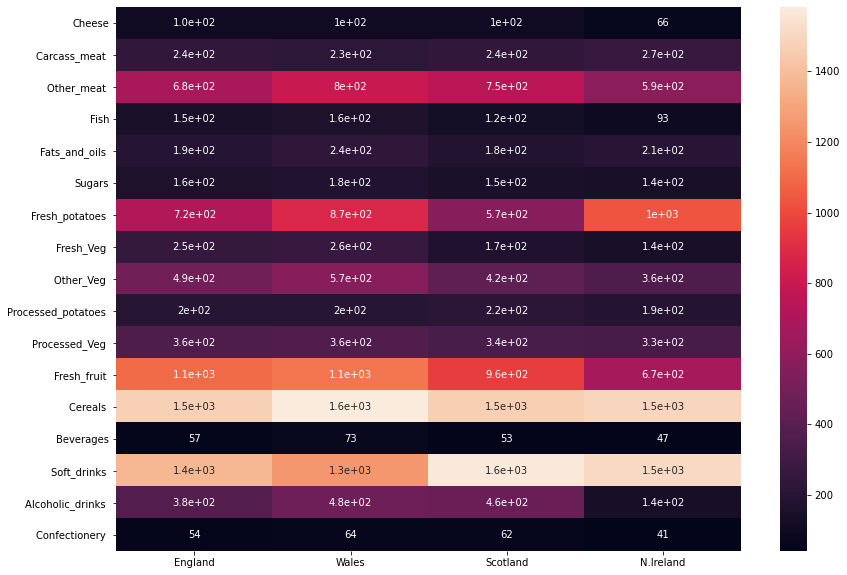

In [10]:
plt.figure(figsize=(14,10))
sns.heatmap(df,annot=True)

**Importing tf libraries for AutoEncoder

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

**Create an encoder with compression 17 --> 8 --> 4 --> 2**

In [35]:
encoder= Sequential()
encoder.add(Dense(8,activation='relu',input_shape=[17]))
encoder.add(Dense(4,activation='relu'))
encoder.add(Dense(2,activation='relu'))


**Create a decoder for 2-->4-->8-->17**

In [36]:
decoder= Sequential()
decoder.add(Dense(4,activation='relu'))
decoder.add(Dense(8,activation='relu'))
decoder.add(Dense(17,activation='relu'))

**Combine the encoder and decoder to be an autoencoder and compile the model.**

In [37]:
autoencoder= Sequential([encoder,decoder])

In [38]:
autoencoder.compile(loss='mse',optimizer=SGD(lr=0.5))

**Create a MinMaxScaler to scale the data with transposed dataframe.**

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scale= MinMaxScaler()

In [18]:
scaled_df= scale.fit_transform(new_df)

In [19]:
scaled_df.shape

(4, 17)

**Fit the autoencoder to the scaled data for 15 epochs.**

In [39]:
autoencoder.fit(scaled_df,scaled_df,epochs=15)

Train on 4 samples
Epoch 1/15
4/4 [==============================] - 0s 118ms/sample - loss: 0.4112
Epoch 2/15
4/4 [==============================] - 0s 566us/sample - loss: 0.3882
Epoch 3/15
4/4 [==============================] - 0s 638us/sample - loss: 0.3451
Epoch 4/15
4/4 [==============================] - 0s 626us/sample - loss: 0.2893
Epoch 5/15
4/4 [==============================] - 0s 589us/sample - loss: 0.2406
Epoch 6/15
4/4 [==============================] - 0s 784us/sample - loss: 0.2174
Epoch 7/15
4/4 [==============================] - 0s 826us/sample - loss: 0.2059
Epoch 8/15
4/4 [==============================] - 0s 767us/sample - loss: 0.1987
Epoch 9/15
4/4 [==============================] - 0s 732us/sample - loss: 0.1938
Epoch 10/15
4/4 [==============================] - 0s 974us/sample - loss: 0.1906
Epoch 11/15
4/4 [==============================] - 0s 876us/sample - loss: 0.1889
Epoch 12/15
4/4 [==============================] - 0s 784us/sample - loss: 0.1875
Epoch 

**Run the scaled data through only the encoder and predict the reduced dimensionalty output.**

In [40]:
encoder.predict(scaled_df)

array([[ 1.474374  , -0.        ],
       [ 2.2060401 , -0.        ],
       [ 1.3162364 , -0.        ],
       [ 0.05906637, -0.        ]], dtype=float32)

In [46]:
predicted_df= pd.DataFrame(encoder.predict(scaled_df),index=new_df.index)

In [48]:
predicted_df.columns=['Dim1','Dim2']

In [49]:
predicted_df

,Dim1,Dim2
England,1.474374,-0.0
Wales,2.206040,-0.0
Scotland,1.316236,-0.0
N.Ireland,0.059066,-0.0


**Plot out these results in a scatterplot, labeled by their respective country**

<AxesSubplot:xlabel='Dim2', ylabel='Dim1'>

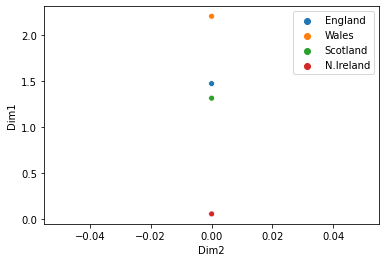

In [65]:
sns.scatterplot(x='Dim2',y='Dim1',data=predicted_df,hue=predicted_df.index)

 Once we go back and look at the data in the table, this makes sense: the Northern Irish eat way more grams of fresh potatoes and way fewer of fresh fruits, cheese, fish and alcoholic drinks. It's a good sign that structure we've visualized reflects a big fact of real-world geography: Northern Ireland is the only of the four countries not on the island of Great Britain.)